In [3]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import json
import matplotlib.pyplot as plt


In [2]:
# Step 1: Load the data from JSON
with open("curieResults.json", 'r') as json_file:
    data = json.load(json_file)

In [6]:
pip install rouge


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install rouge-score


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

candidate_summary = "the cat was found under the bed"
reference_summary = "the cat was under the bed"
scores = scorer.score(reference_summary, candidate_summary)
for key in scores:
    print(f'{key}: {scores[key]}')

rouge1: Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)
rouge2: Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272)
rougeL: Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)


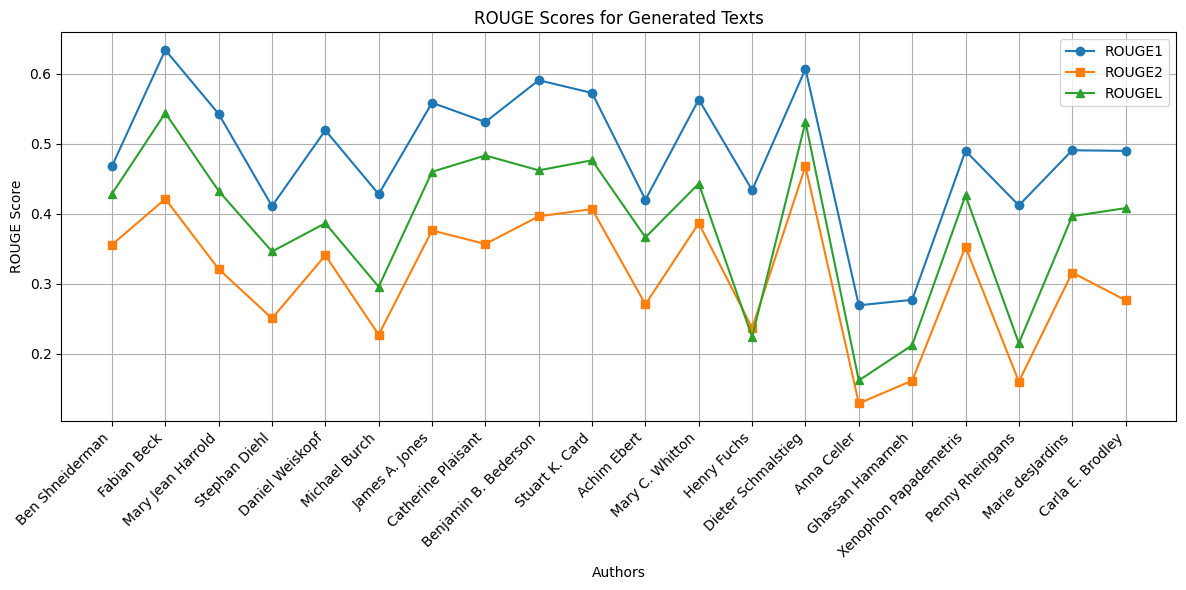

In [4]:
import json
from rouge_score import rouge_scorer
import csv
import matplotlib.pyplot as plt

# Step 1: Load the data from JSON
with open("curieResults.json", 'r') as json_file:
    data = json.load(json_file)

# List to store ROUGE scores
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []
authors = []  # List to store author names

# Iterate over each entry in the JSON data
for entry in data:
    author_name = entry['name']
    existing_text = entry['existing_text2']
    generated_text1 = entry['generated_text1']
    generated_text2 = entry['generated_text2']
    generated_text3 = entry['generated_text3']

    # Create RougeScorer instance
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Calculate ROUGE scores for each generated text
    scores1 = scorer.score(existing_text, generated_text1)
    scores2 = scorer.score(existing_text, generated_text2)
    scores3 = scorer.score(existing_text, generated_text3)

    rouge1_scores.append((scores1['rouge1'].fmeasure + scores2['rouge1'].fmeasure + scores3['rouge1'].fmeasure) / 3)
    rouge2_scores.append((scores1['rouge2'].fmeasure + scores2['rouge2'].fmeasure + scores3['rouge2'].fmeasure) / 3)
    rougeL_scores.append((scores1['rougeL'].fmeasure + scores2['rougeL'].fmeasure + scores3['rougeL'].fmeasure) / 3)
    authors.append(author_name)

# Define x_values using author names
x_values = authors

# Create a list of dictionaries for each entry's ROUGE scores
results = []
for i in range(len(data)):
    result = {
        'Author': authors[i],
        'ROUGE1': rouge1_scores[i],
        'ROUGE2': rouge2_scores[i],
        'ROUGEL': rougeL_scores[i]
    }
    results.append(result)

# Write the results to a CSV file
#csv_file = 'rouge_scores.csv'
#with open(csv_file, 'w', newline='') as csvfile:
 #   fieldnames = ['Author', 'ROUGE1', 'ROUGE2', 'ROUGEL']
  #  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
   # writer.writeheader()
    #for result in results:
     #   writer.writerow(result)

# Plot the ROUGE scores as line plots
plt.figure(figsize=(12, 6))

plt.plot(x_values, rouge1_scores, label='ROUGE1', marker='o')
plt.plot(x_values, rouge2_scores, label='ROUGE2', marker='s')
plt.plot(x_values, rougeL_scores, label='ROUGEL', marker='^')

plt.xlabel('Authors')
plt.ylabel('ROUGE Score')
plt.title('ROUGE Scores for Generated Texts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


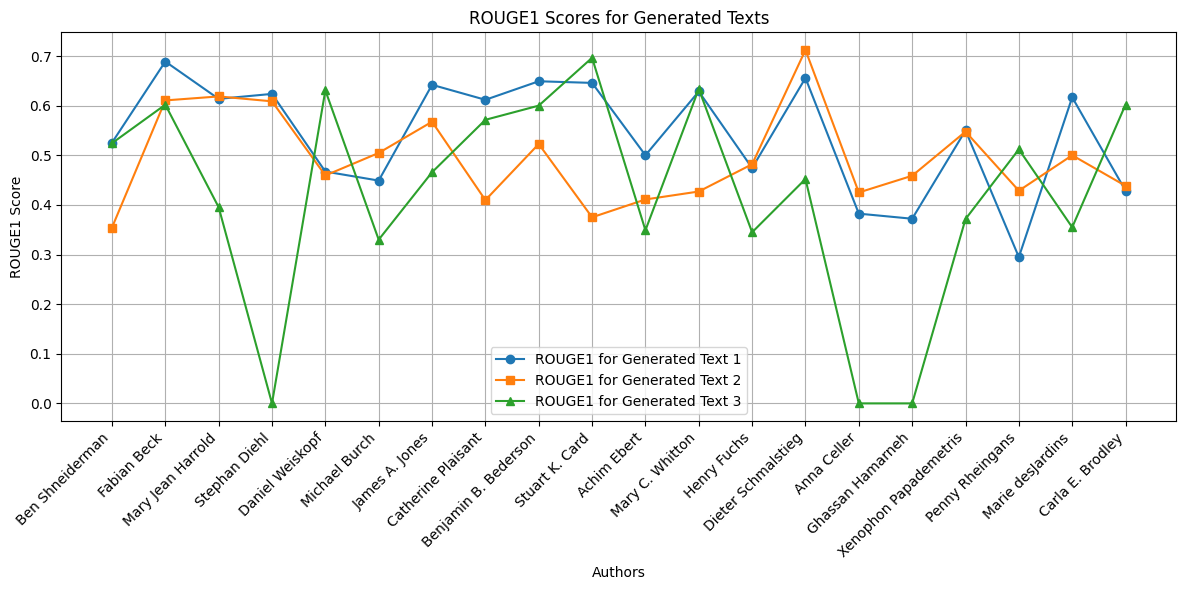

In [5]:
import json
from rouge_score import rouge_scorer
import csv
import matplotlib.pyplot as plt

# Step 1: Load the data from JSON
with open("curieResults.json", 'r') as json_file:
    data = json.load(json_file)

# List to store ROUGE scores
rouge1_scores_generated1 = []
rouge2_scores_generated1 = []
rougeL_scores_generated1 = []

rouge1_scores_generated2 = []
rouge2_scores_generated2 = []
rougeL_scores_generated2 = []

rouge1_scores_generated3 = []
rouge2_scores_generated3 = []
rougeL_scores_generated3 = []

authors = []  # List to store author names

# Iterate over each entry in the JSON data
for entry in data:
    author_name = entry['name']
    existing_text = entry['existing_text2']
    generated_text1 = entry['generated_text1']
    generated_text2 = entry['generated_text2']
    generated_text3 = entry['generated_text3']

    # Create RougeScorer instance
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Calculate ROUGE scores for generated_text1
    scores1 = scorer.score(existing_text, generated_text1)
    rouge1_scores_generated1.append(scores1['rouge1'].fmeasure)
    rouge2_scores_generated1.append(scores1['rouge2'].fmeasure)
    rougeL_scores_generated1.append(scores1['rougeL'].fmeasure)

    # Calculate ROUGE scores for generated_text2
    scores2 = scorer.score(existing_text, generated_text2)
    rouge1_scores_generated2.append(scores2['rouge1'].fmeasure)
    rouge2_scores_generated2.append(scores2['rouge2'].fmeasure)
    rougeL_scores_generated2.append(scores2['rougeL'].fmeasure)

    # Calculate ROUGE scores for generated_text3
    scores3 = scorer.score(existing_text, generated_text3)
    rouge1_scores_generated3.append(scores3['rouge1'].fmeasure)
    rouge2_scores_generated3.append(scores3['rouge2'].fmeasure)
    rougeL_scores_generated3.append(scores3['rougeL'].fmeasure)

    authors.append(author_name)  # Store author name

# Define x_values using author names
x_values = authors

# Write the results to a CSV file
csv_file = 'rouge_scores.csv'
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ['Author', 'ROUGE1_Generated_Text1', 'ROUGE2_Generated_Text1', 'ROUGEL_Generated_Text1',
                  'ROUGE1_Generated_Text2', 'ROUGE2_Generated_Text2', 'ROUGEL_Generated_Text2',
                  'ROUGE1_Generated_Text3', 'ROUGE2_Generated_Text3', 'ROUGEL_Generated_Text3']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i, author in enumerate(authors):
        result = {
            'Author': author,
            'ROUGE1_Generated_Text1': rouge1_scores_generated1[i],
            'ROUGE2_Generated_Text1': rouge2_scores_generated1[i],
            'ROUGEL_Generated_Text1': rougeL_scores_generated1[i],
            'ROUGE1_Generated_Text2': rouge1_scores_generated2[i],
            'ROUGE2_Generated_Text2': rouge2_scores_generated2[i],
            'ROUGEL_Generated_Text2': rougeL_scores_generated2[i],
            'ROUGE1_Generated_Text3': rouge1_scores_generated3[i],
            'ROUGE2_Generated_Text3': rouge2_scores_generated3[i],
            'ROUGEL_Generated_Text3': rougeL_scores_generated3[i]
        }
        writer.writerow(result)

# Plot the ROUGE scores as line plots (similar to previous code)
# ...
# Define x_values using author names

# Plot the ROUGE scores as line plots
plt.figure(figsize=(12, 6))

plt.plot(x_values, rouge1_scores_generated1, label='ROUGE1 for Generated Text 1', marker='o')
plt.plot(x_values, rouge1_scores_generated2, label='ROUGE1 for Generated Text 2', marker='s')
plt.plot(x_values, rouge1_scores_generated3, label='ROUGE1 for Generated Text 3', marker='^')

plt.xlabel('Authors')
plt.ylabel('ROUGE1 Score')
plt.title('ROUGE1 Scores for Generated Texts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

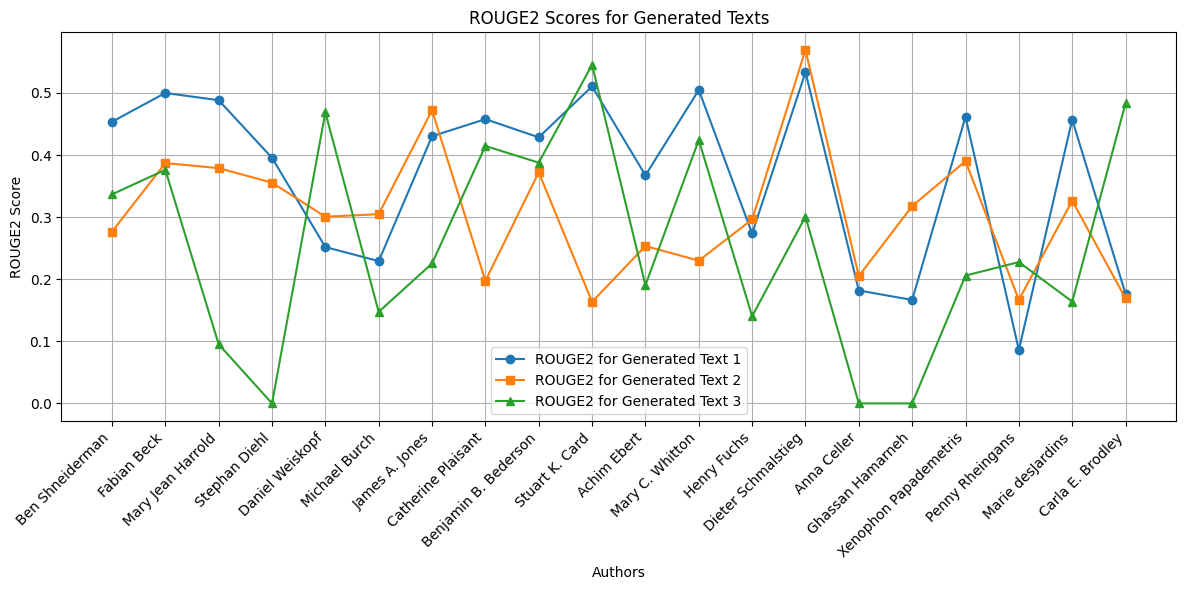

In [6]:
import json
from rouge_score import rouge_scorer
import csv
import matplotlib.pyplot as plt# Plot the ROUGE scores as line plots
plt.figure(figsize=(12, 6))

plt.plot(x_values, rouge2_scores_generated1, label='ROUGE2 for Generated Text 1', marker='o')
plt.plot(x_values, rouge2_scores_generated2, label='ROUGE2 for Generated Text 2', marker='s')
plt.plot(x_values, rouge2_scores_generated3, label='ROUGE2 for Generated Text 3', marker='^')

plt.xlabel('Authors')
plt.ylabel('ROUGE2 Score')
plt.title('ROUGE2 Scores for Generated Texts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

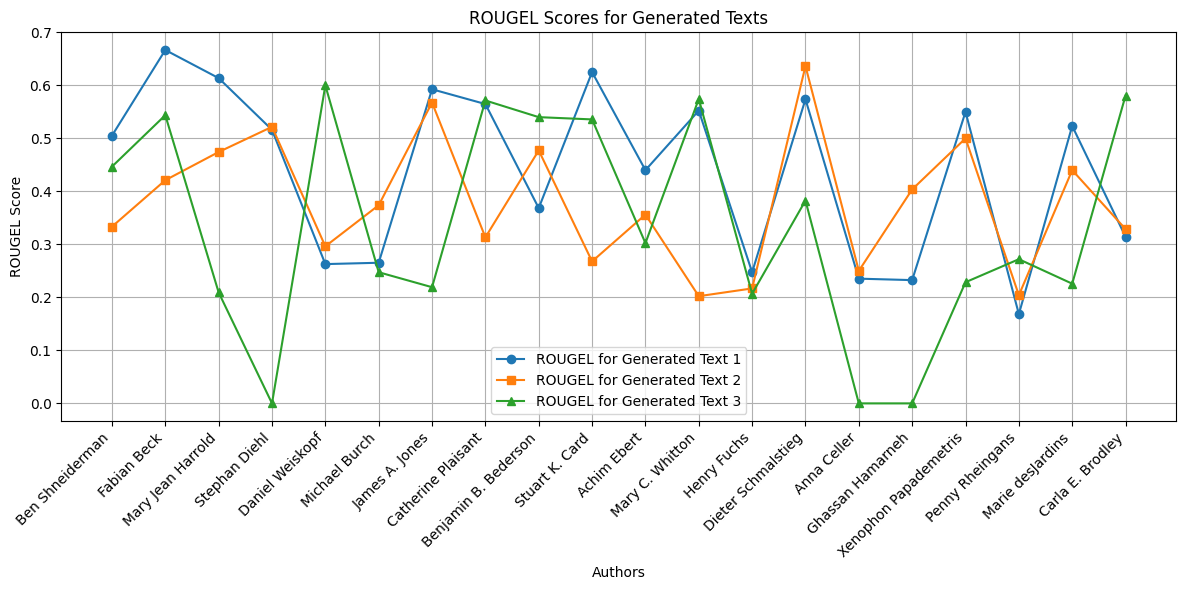

In [7]:
# Plot the ROUGE scores as line plots
plt.figure(figsize=(12, 6))

plt.plot(x_values, rougeL_scores_generated1, label='ROUGEL for Generated Text 1', marker='o')
plt.plot(x_values, rougeL_scores_generated2, label='ROUGEL for Generated Text 2', marker='s')
plt.plot(x_values, rougeL_scores_generated3, label='ROUGEL for Generated Text 3', marker='^')

plt.xlabel('Authors')
plt.ylabel('ROUGEL Score')
plt.title('ROUGEL Scores for Generated Texts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()